In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

import pandas as pd
import seaborn as sns
sns.set()

# Say we have some function $y = x^2$

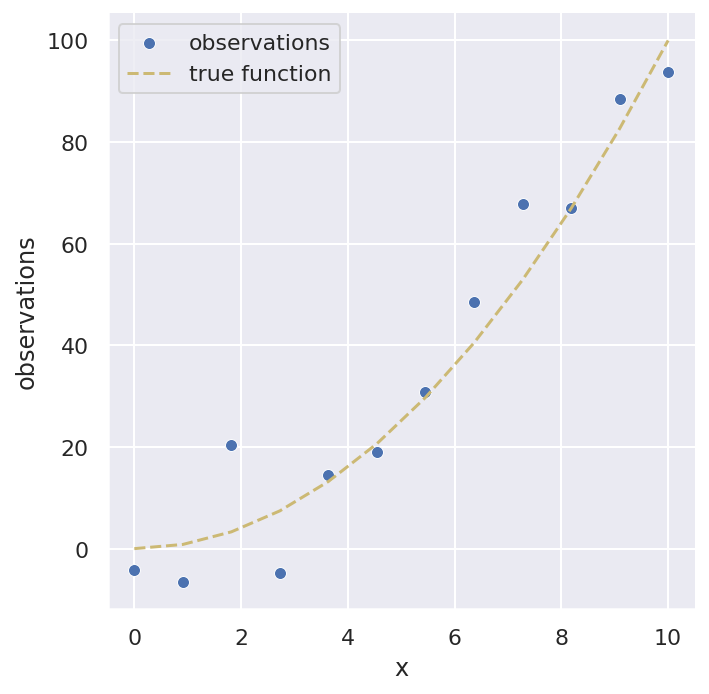

In [2]:
# Let's draw some data
num_samples = 12
x_vals = np.linspace(0,10,num_samples)
df = pd.DataFrame(
    {
        'x':x_vals,
        'observations':np.power(x_vals,2)+np.random.normal(scale = 10,size=num_samples),
        'true function':np.power(x_vals,2)
    }
)

sns.relplot(data=df,x='x',y='observations',label='observations')
plt.plot(df.x,df['true function'],'--',c='y',label='true function')
plt.legend()
plt.show()

# Can we learn our function from (noisy) observations?

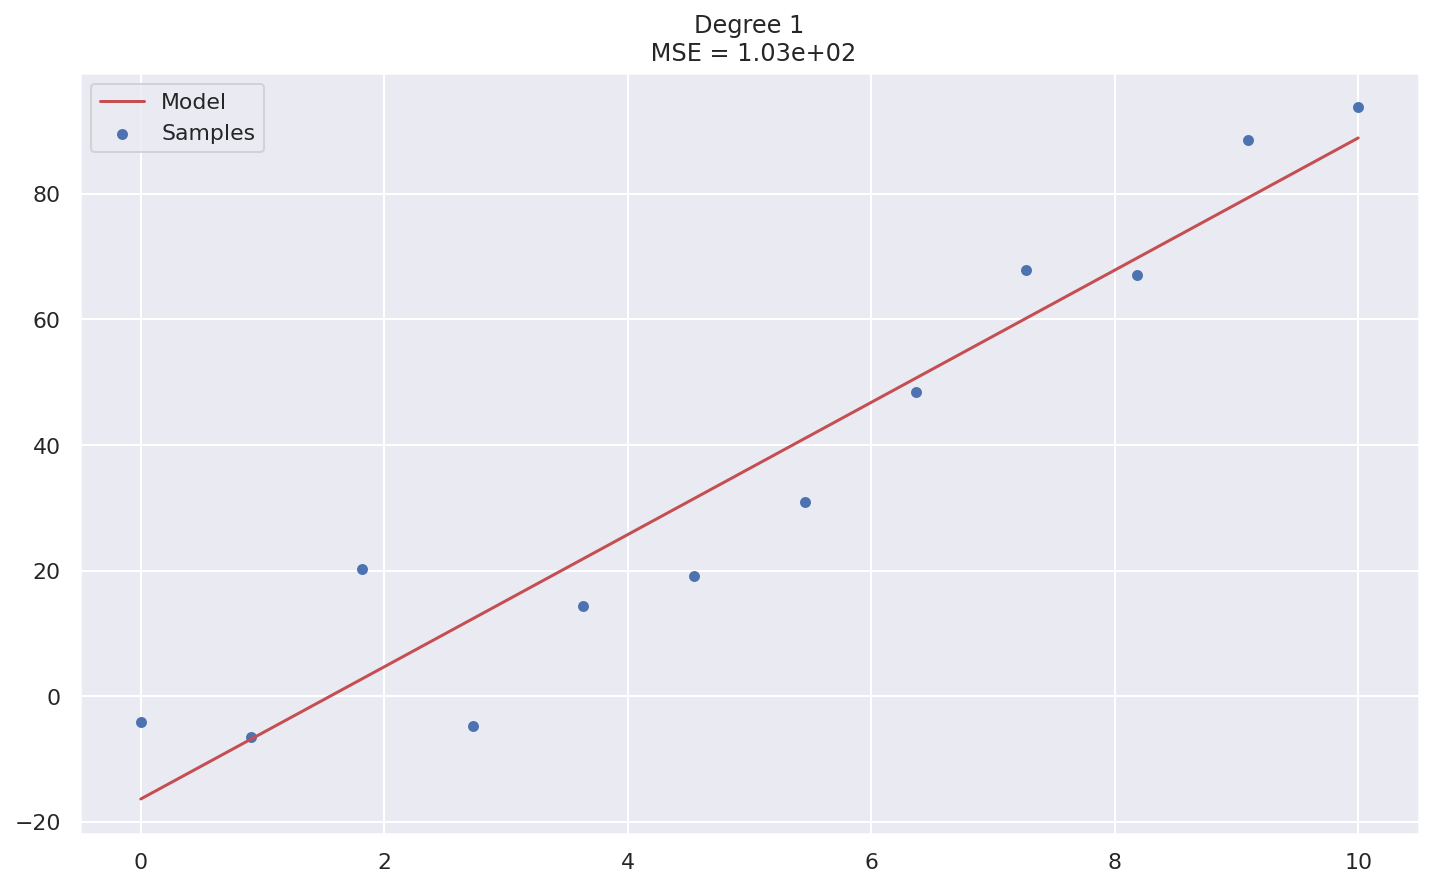

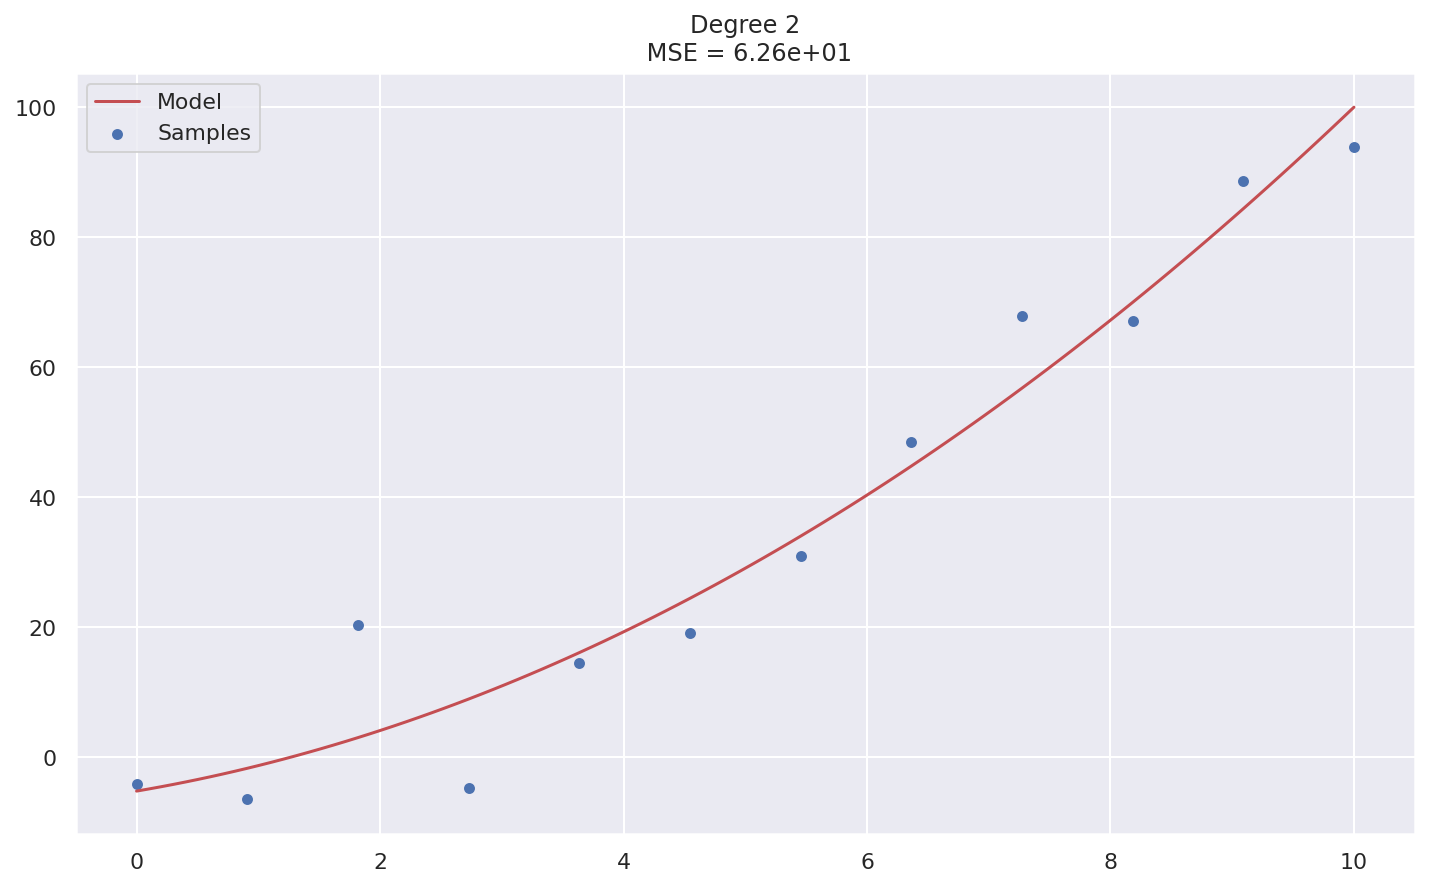

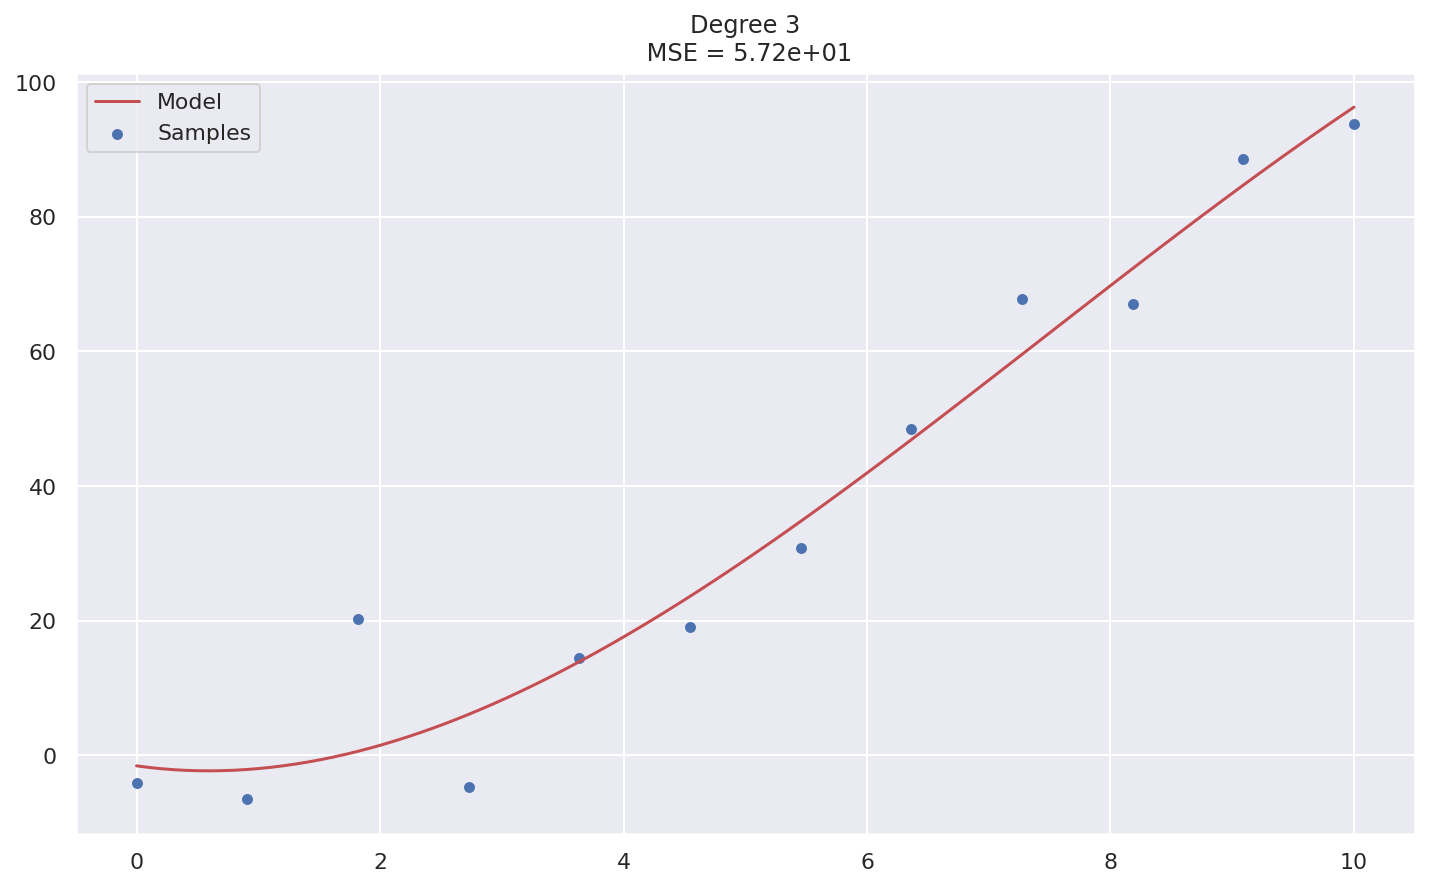

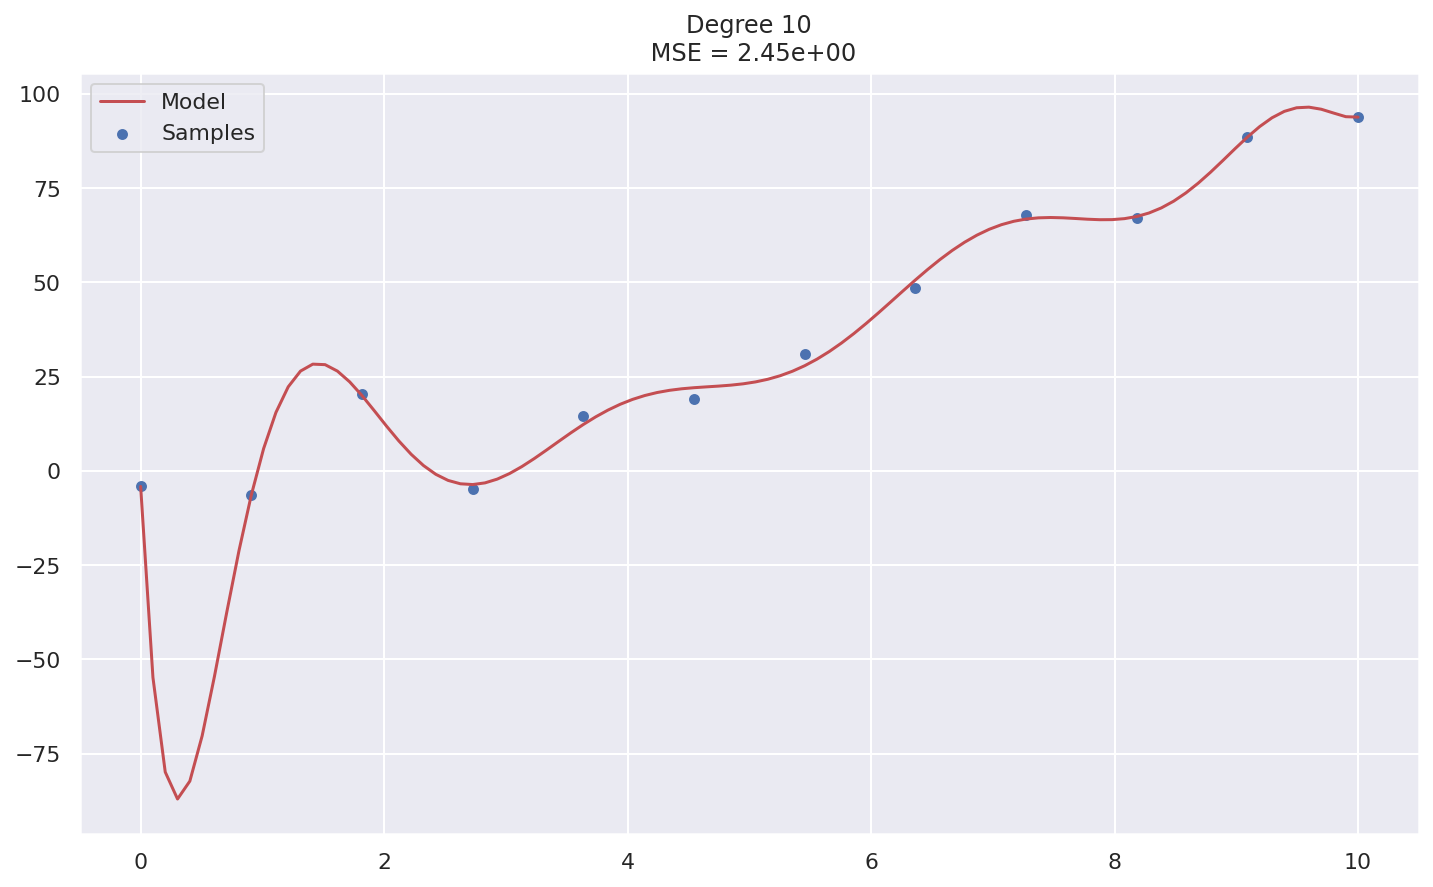

In [3]:
def squared_error(y_hat,y):
    return np.sum(np.power(y_hat-y,2))/y.size

def fit_polynomial_curve(x,y,degree):
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    numpy_x = x.to_numpy()
    pipeline.fit(numpy_x[:, np.newaxis], y)

    y_hat = pipeline.predict(numpy_x[:, np.newaxis])

    x_test = np.linspace(x.min(), x.max(), 100)

    plt.plot(x_test, pipeline.predict(x_test[:, np.newaxis]),c='r', label="Model")

    plt.scatter(x, y, edgecolor="b", s=20, label="Samples")
    plt.legend()
    plt.title(
        "Degree {}\n MSE = {:.2e}".format(
            degree, squared_error(y_hat,y)
        ))
    plt.show()
    return pipeline

degree_1 = fit_polynomial_curve(df.x,df.observations,1)
degree_2 = fit_polynomial_curve(df.x,df.observations,2)
degree_3 = fit_polynomial_curve(df.x,df.observations,3)
degree_10 = fit_polynomial_curve(df.x,df.observations,10)

poly_models = [degree_1,degree_2,degree_3,degree_10]

# What if we draw more points from our true function?

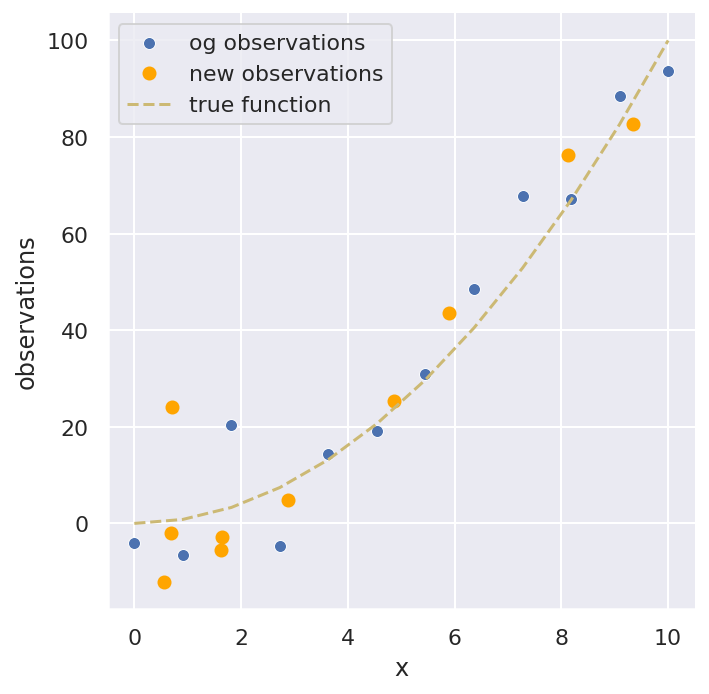

In [4]:
num_new_samples = 10
new_x_values = 10*np.random.rand(num_new_samples)
new_observations = np.power(new_x_values,2)+np.random.normal(scale=10,size=num_new_samples)

sns.relplot(data=df,x='x',y='observations',label='og observations')
plt.plot(new_x_values,new_observations,'o',c='orange',label='new observations')
plt.plot(df.x,df['true function'],'--',c='y',label='true function')
plt.legend()
plt.show()

# How well will our models predict these new points?

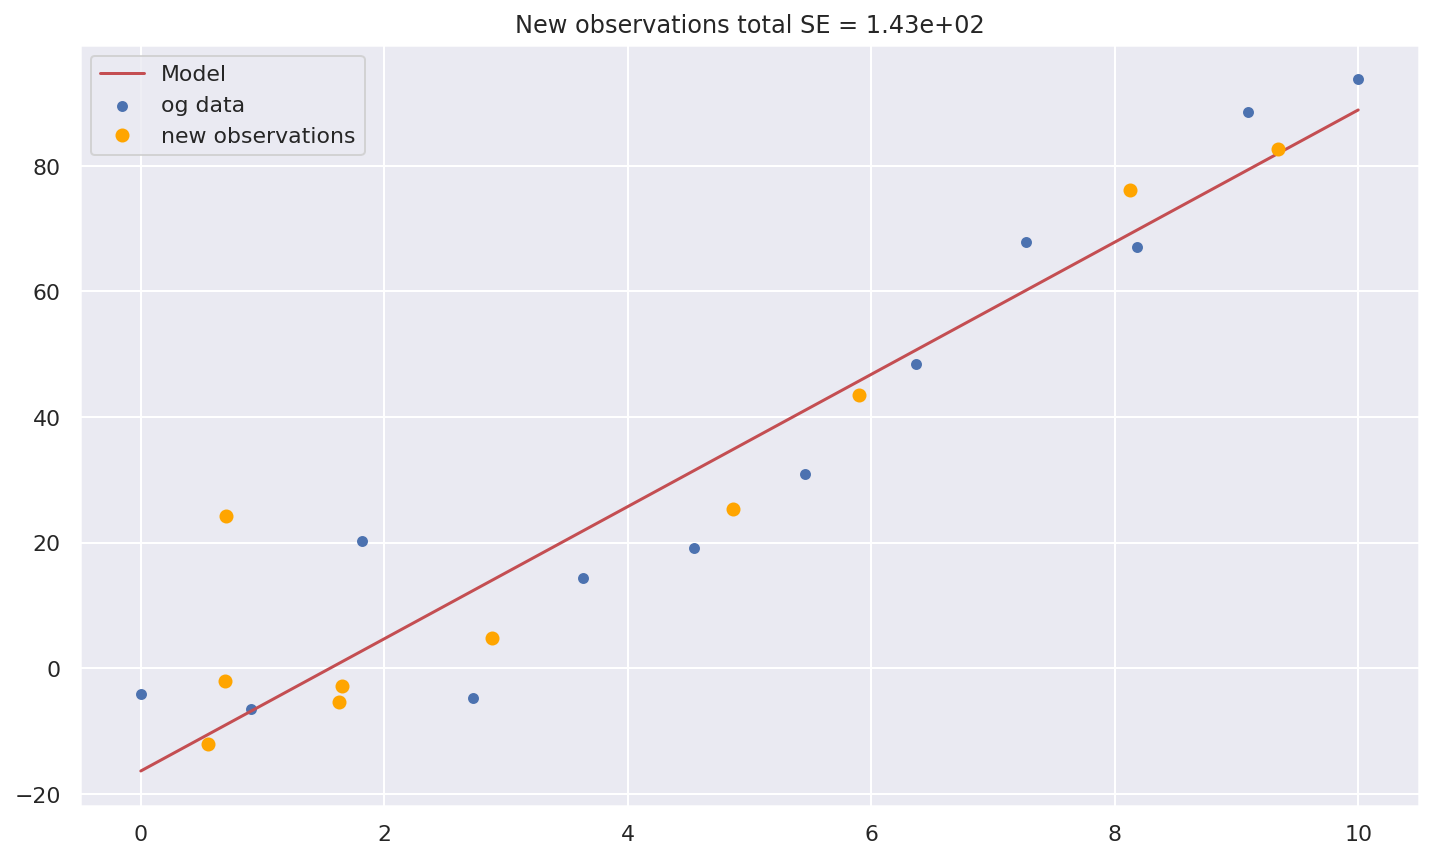

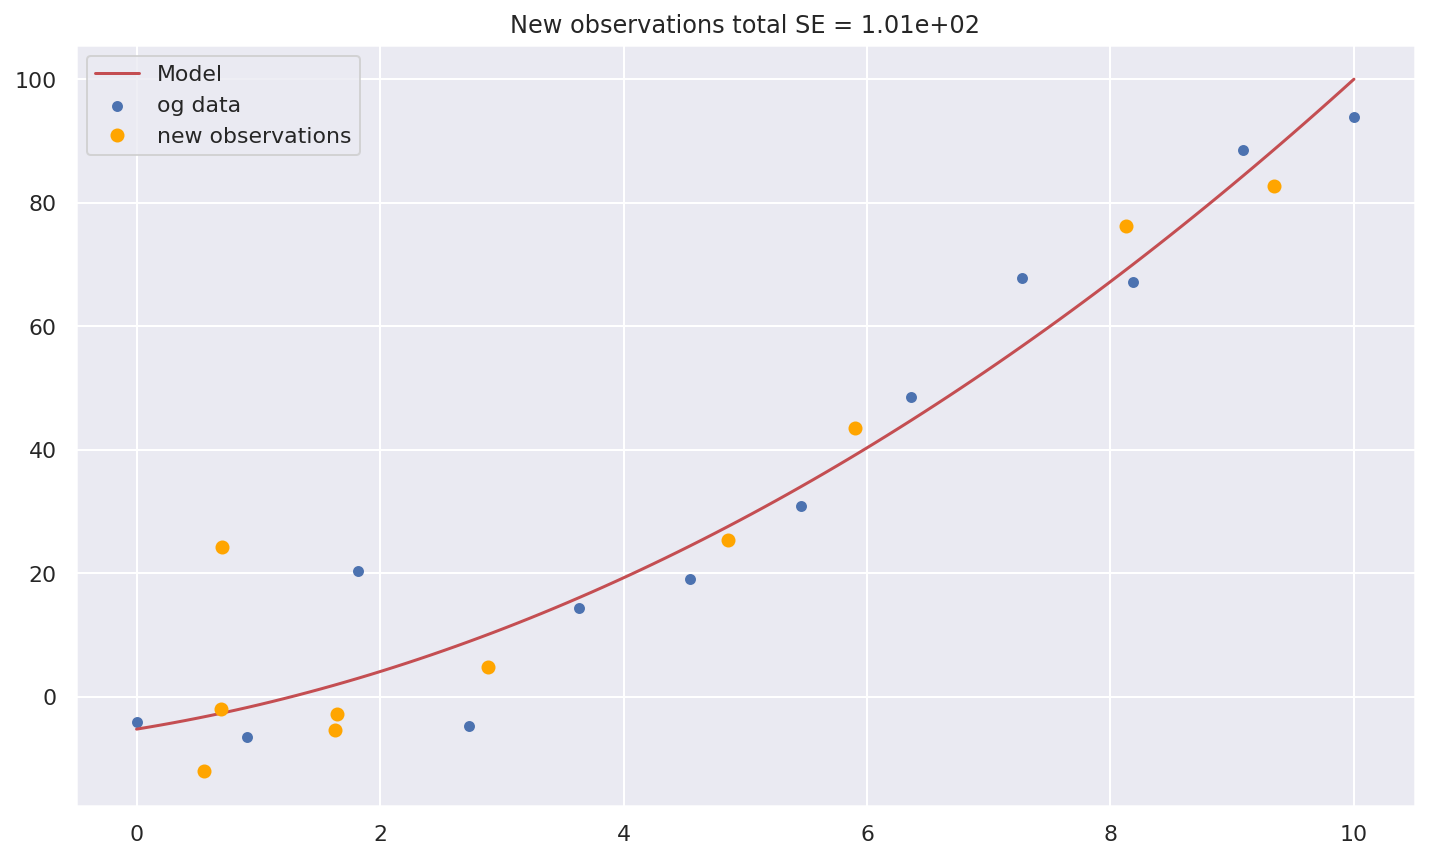

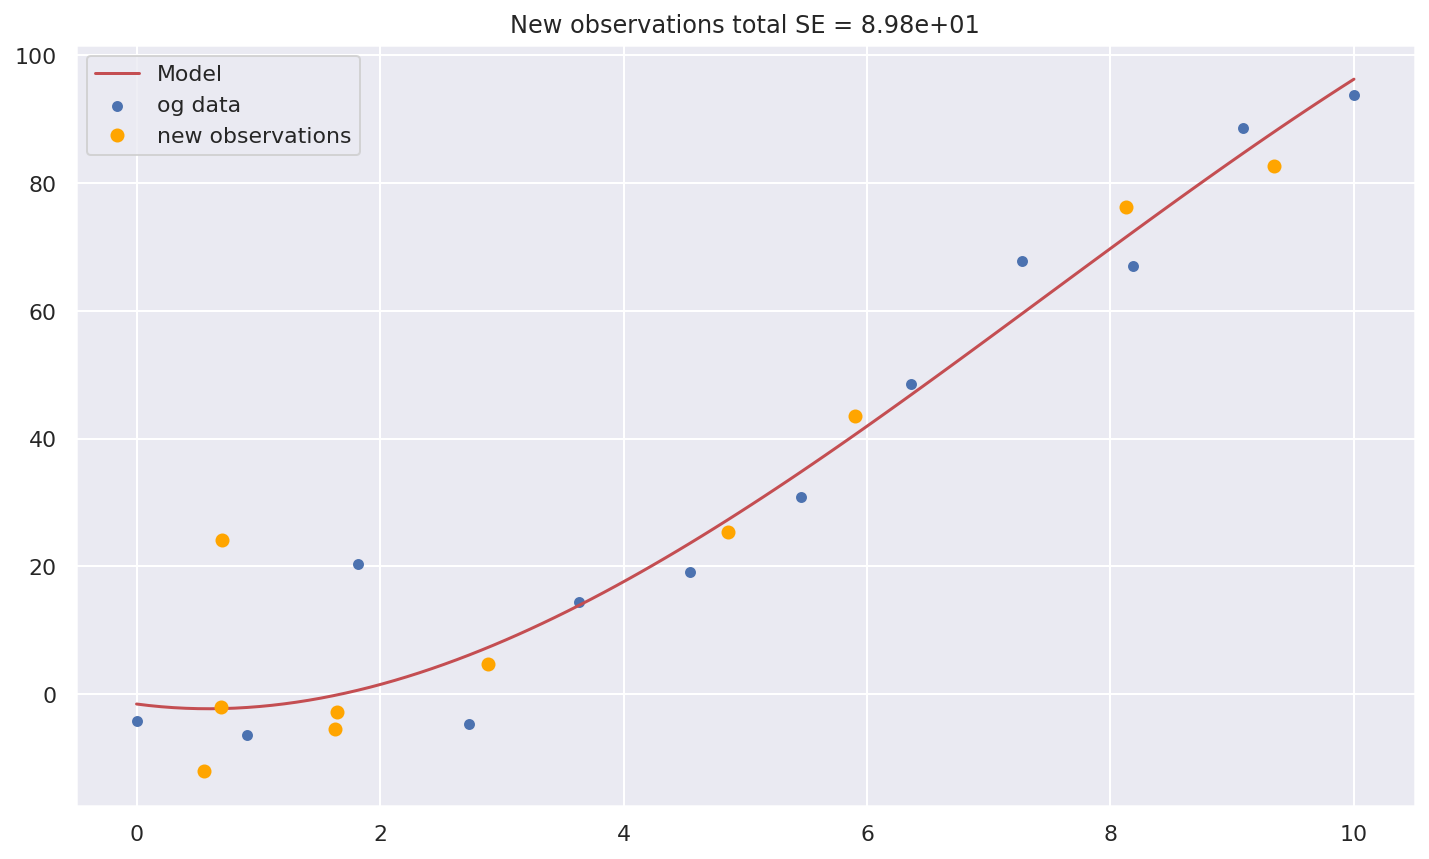

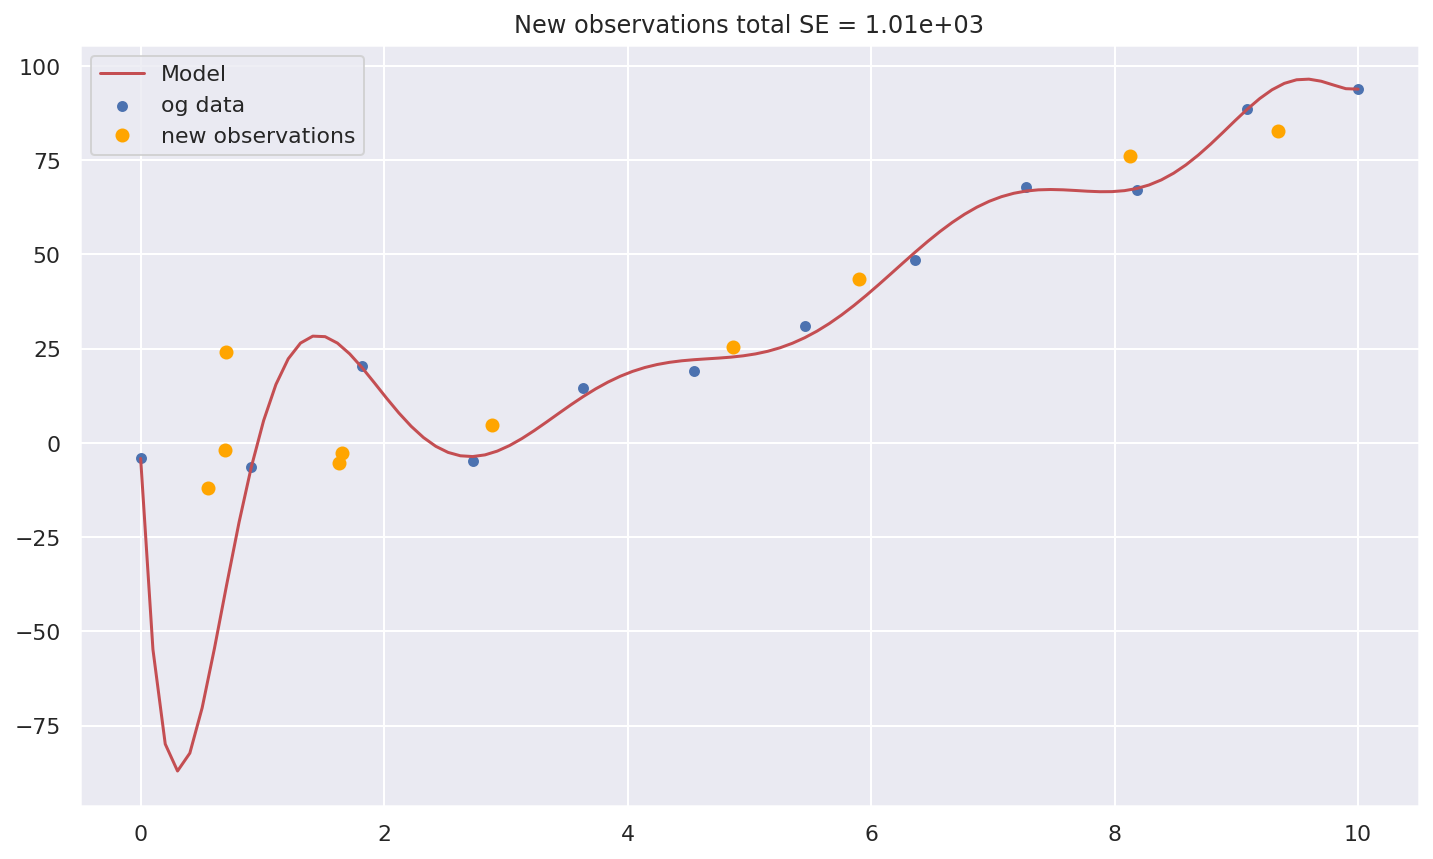

In [5]:
x_test = np.linspace(df.x.min(), df.x.max(), 100)

for pipeline in poly_models:

    new_y_hat = pipeline.predict(new_x_values[:, np.newaxis])

    plt.plot(x_test, pipeline.predict(x_test[:, np.newaxis]),c='r', label="Model")

    plt.scatter(df.x, df.observations, edgecolor="b", s=20, label="og data")
    plt.plot(new_x_values,new_observations,'o',c='orange',label='new observations')
    plt.legend()
    plt.title(
        "New observations total SE = {:.2e}".format(
            squared_error(new_y_hat,new_observations)
        ))
    plt.show()


# How do our models compare under cross-validation?

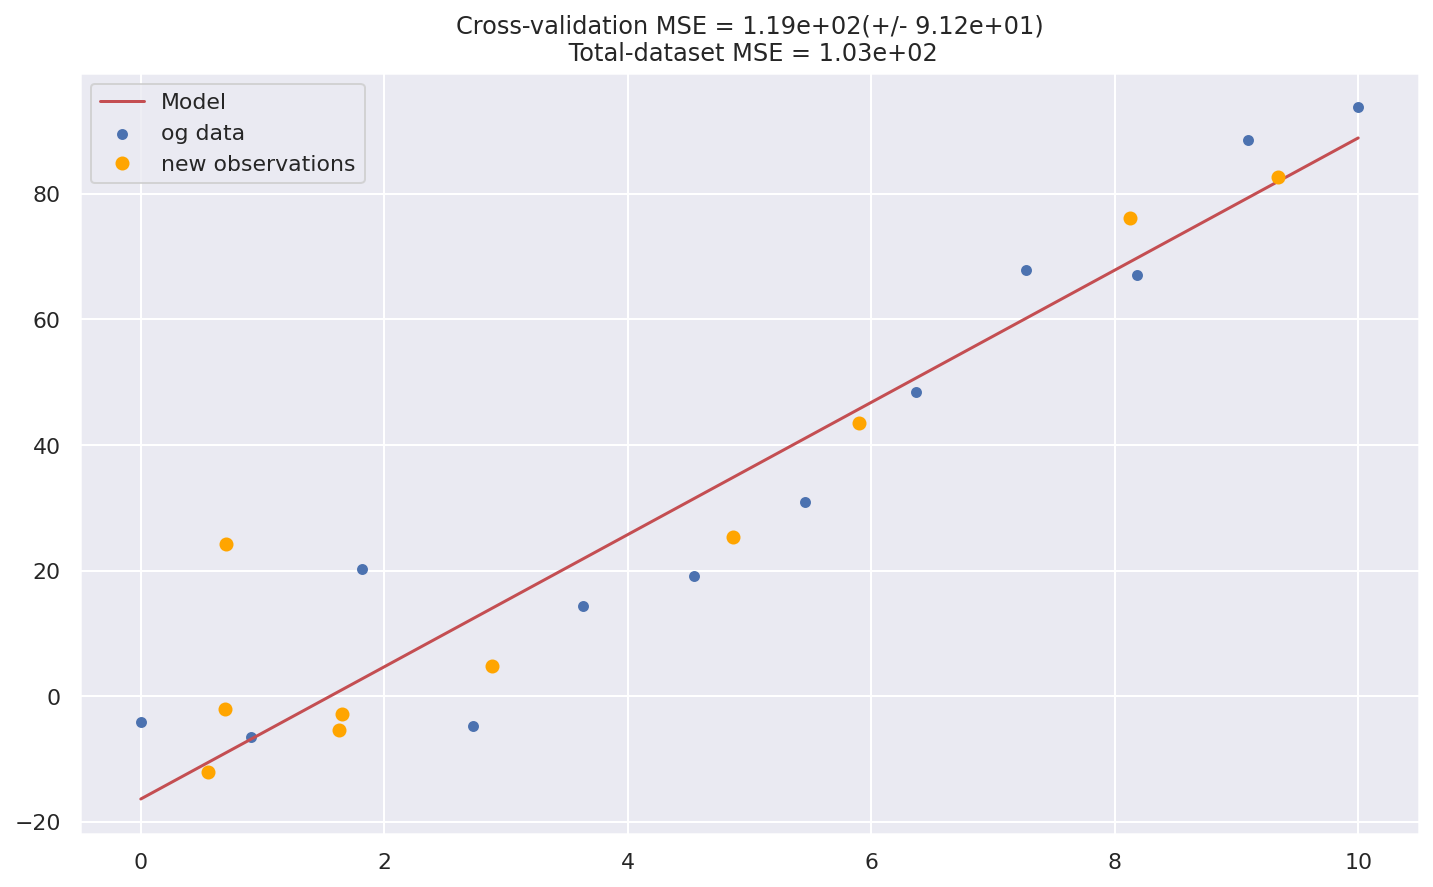

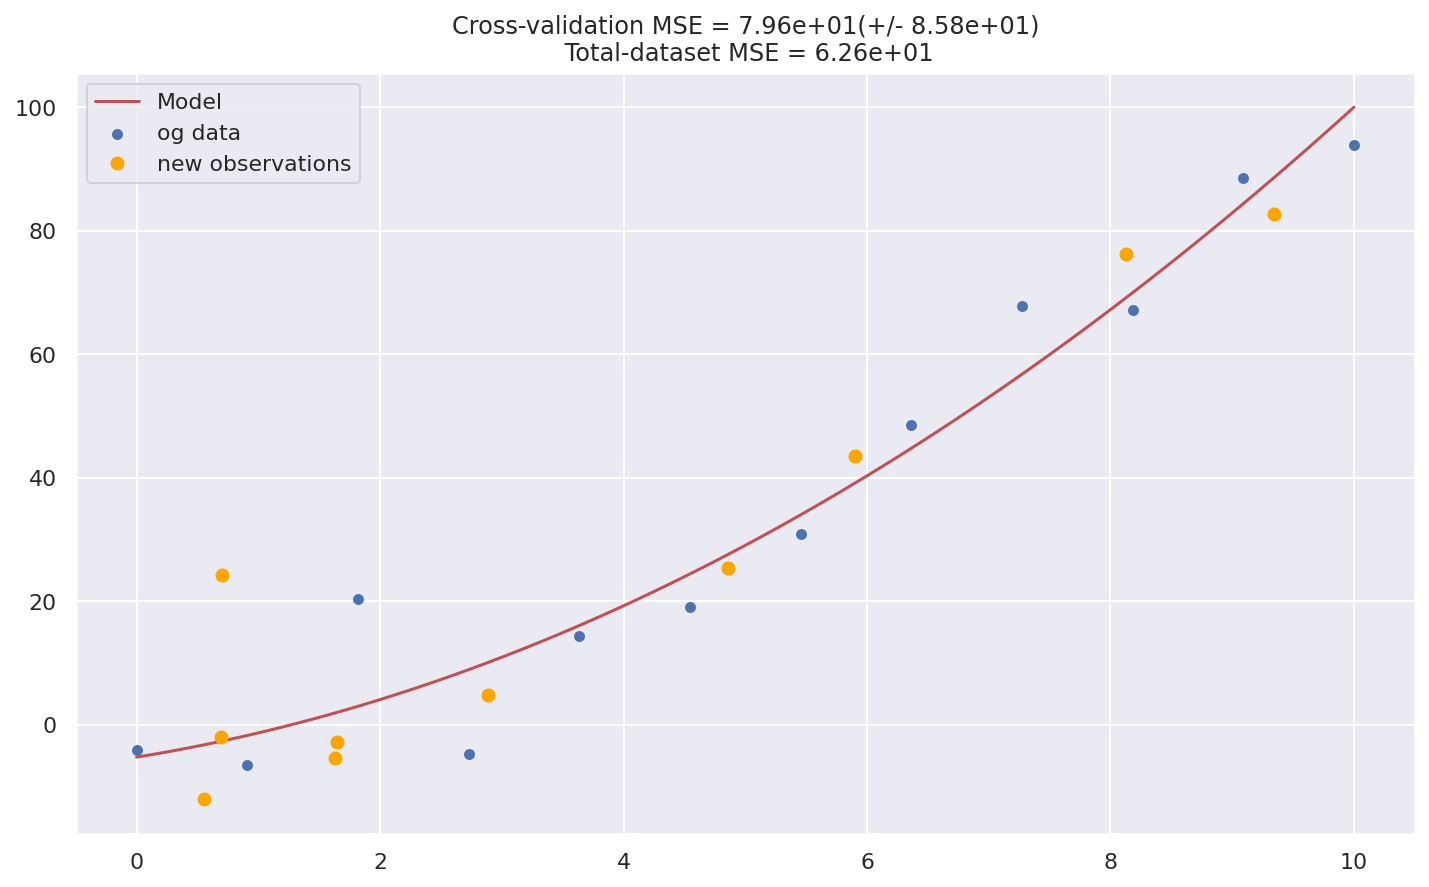

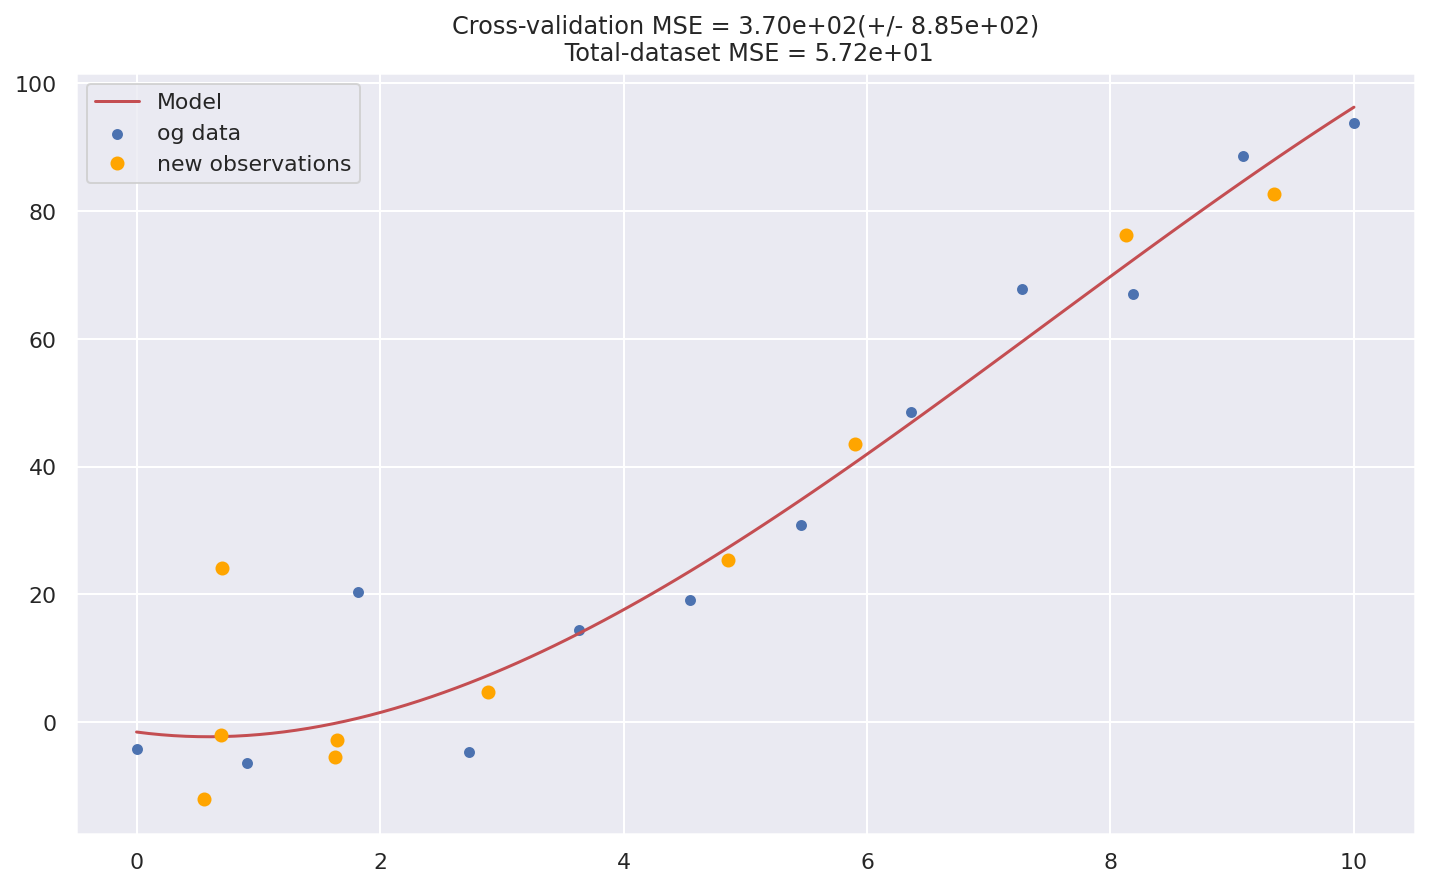

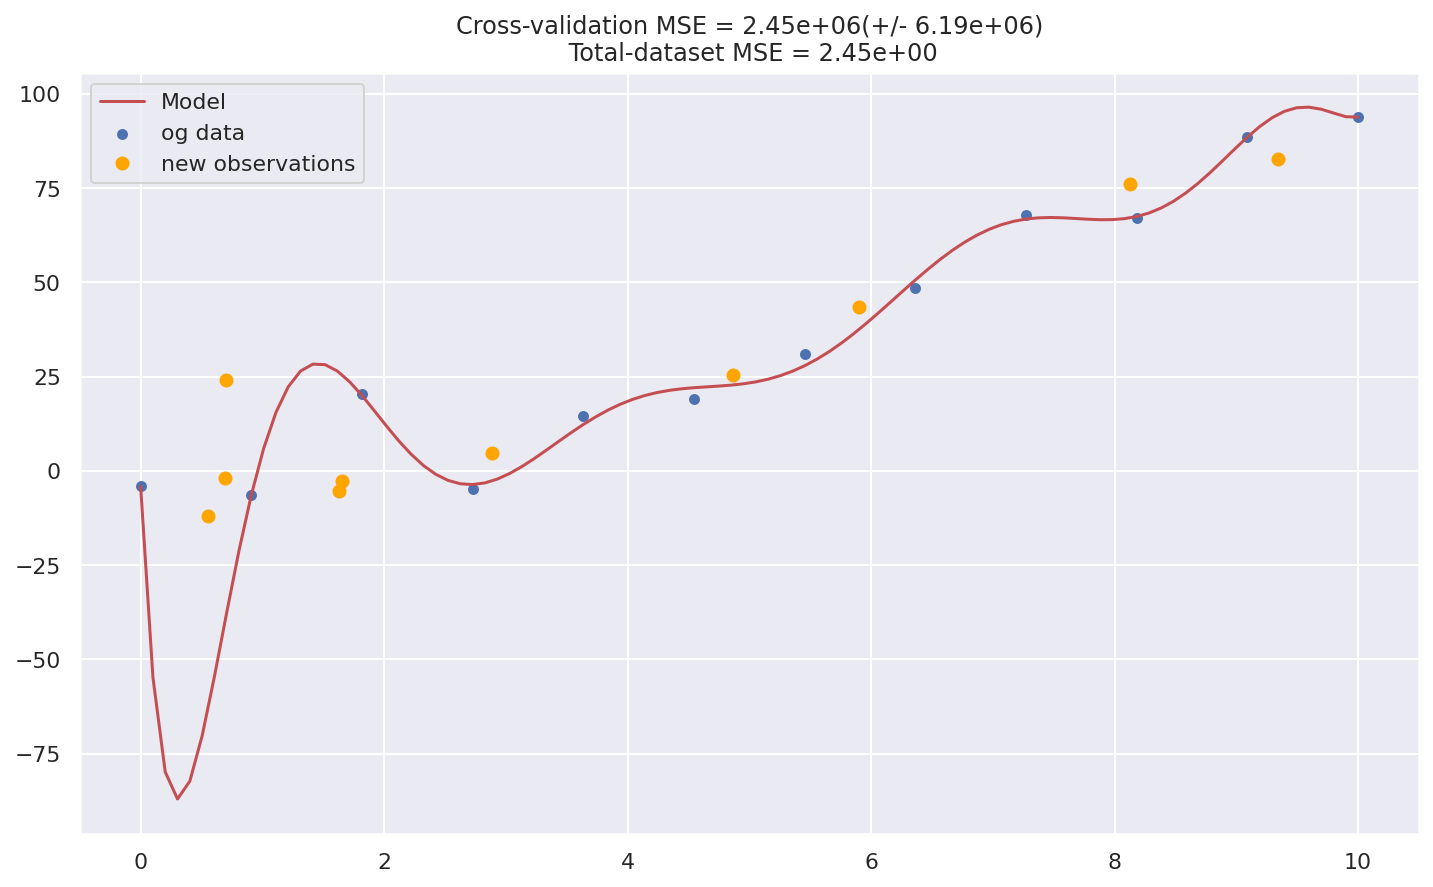

In [6]:
numpy_x = df.x.to_numpy()
x_test = np.linspace(df.x.min(), df.x.max(), 100)

for pipeline in poly_models:

    y_hat = pipeline.predict(numpy_x[:, np.newaxis])

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline, numpy_x[:, np.newaxis], df.observations, scoring="neg_mean_squared_error", cv=10
    )

    plt.plot(x_test, pipeline.predict(x_test[:, np.newaxis]),c='r', label="Model")
    plt.scatter(df.x, df.observations, edgecolor="b", s=20, label="og data")
    plt.plot(new_x_values,new_observations,'o',c='orange',label='new observations')
    plt.legend()

    plt.title(
        "Cross-validation MSE = {:.2e}(+/- {:.2e})\n Total-dataset MSE = {:.2e}".format(-scores.mean(),scores.std(),
                                                                                                   squared_error(y_hat,df.observations)
        ))

    plt.show()
